## Installing and importing dependencies

In [4]:
!python -m pip install paddlepaddle==2.0.0 -i https://mirror.baidu.com/pypi/simple --user --no-warn-script-location

Looking in indexes: https://mirror.baidu.com/pypi/simple


In [7]:
!pip install paddleocr --user --no-warn-script-location

  Using cached paddleocr-2.6.1.3-py3-none-any.whl (445 kB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
  Using cached beautifulsoup4-4.11.2-py3-none-any.whl (129 kB)
  Using cached openpyxl-3.1.0-py2.py3-none-any.whl (250 kB)
  Using cached pdf2docx-0.5.6-py3-none-any.whl (148 kB)
  Using cached premailer-3.10.0-py2.py3-none-any.whl (19 kB)
  Using cached attrdict-2.0.1-py2.py3-none-any.whl (9.9 kB)
  Using cached visualdl-2.5.0-py3-none-any.whl (6.3 MB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached cssselect-1.2.0-py2.py3-none-any.whl (18 kB)
  Using cached cssutils-2.6.0-py3-none-any.whl (399 kB)
  Using cached multiprocess-0.70.14-py37-none-any.whl (115 kB)
  Using cached bce_python_sdk-0.8.79-py3-none-any.whl (207 kB)
  Using cached x2paddle-1.4.0-py3-none-any.whl (319 kB)
  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
  Using cached flask_babel-3.0.1-py3-none-any.whl (11 kB)
  Using cached tritonclient-2.30.0-py3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.0 requires grpcio~=1.32.0, but you have grpcio 1.51.1 which is incompatible.
tensorflow 2.4.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
mediapipe 0.9.0.1 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.


In [6]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
Updating files:  44% (715/1620)
Updating files:  45% (729/1620)
Updating files:  46% (746/1620)
Updating files:  47% (762/1620)
Updating files:  48% (778/1620)
Updating files:  49% (794/1620)
Updating files:  50% (810/1620)
Updating files:  51% (827/1620)
Updating files:  52% (843/1620)
Updating files:  53% (859/1620)
Updating files:  54% (875/1620)
Updating files:  55% (891/1620)
Updating files:  56% (908/1620)
Updating files:  57% (924/1620)
Updating files:  58% (940/1620)
Updating files:  59% (956/1620)
Updating files:  60% (972/1620)
Updating files:  61% (989/1620)
Updating files:  62% (1005/1620)
Updating files:  63% (1021/1620)
Updating files:  64% (1037/1620)
Updating files:  65% (1053/1620)
Updating files:  66% (1070/1620)
Updating files:  67% (1086/1620)
Updating files:  68% (1102/1620)
Updating files:  69% (1118/1620)
Updating files:  70% (1134/1620)
Updating files:  71% (1151/1620)
Updating files:  72% (1167/1620)
Updating files:  73% (1183/1620)


In [8]:
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
import cv2 
import os

##  Setup Model for Detection

In [9]:
ocr = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to C:\Users\shrut/.paddleocr/whl\det\en\en_PP-OCRv3_det_infer\en_PP-OCRv3_det_infer.tar


100%|███████████████████████████████████████████████████████████████████████████████████████| 4.00M/4.00M [00:03<00:00, 1.03MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to C:\Users\shrut/.paddleocr/whl\rec\en\en_PP-OCRv3_rec_infer\en_PP-OCRv3_rec_infer.tar


100%|████████████████████████████████████████████████████████████████████████████████████████| 9.96M/9.96M [00:13<00:00, 732kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\shrut/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar


100%|████████████████████████████████████████████████████████████████████████████████████████| 2.19M/2.19M [00:08<00:00, 248kiB/s]

[2023/02/11 15:30:32] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\shrut/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\shrut/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

In [63]:
img_path = os.path.join('.', 'Inci2.jpeg')

In [64]:
result = ocr.ocr(img_path)

[2023/02/11 16:04:17] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/11 16:04:18] ppocr DEBUG: dt_boxes num : 11, elapse : 0.9824790954589844
[2023/02/11 16:04:25] ppocr DEBUG: rec_res num  : 11, elapse : 6.590276479721069


In [65]:
result

[[[[[591.0, 180.0], [1445.0, 232.0], [1442.0, 285.0], [588.0, 233.0]],
   ('INGREDIENTS:DISODIUMLAURYL', 0.9401483535766602)],
  [[[590.0, 255.0], [1440.0, 307.0], [1437.0, 360.0], [587.0, 308.0]],
   ('SULFOSUCCINATE.MALTODEXTRIN', 0.9778546690940857)],
  [[[585.0, 330.0], [1439.0, 384.0], [1435.0, 437.0], [582.0, 383.0]],
   ('SODIUMCOCOYLISETHIONATE', 0.971731424331665)],
  [[[585.0, 402.0], [1437.0, 459.0], [1433.0, 517.0], [582.0, 460.0]],
   ('STEARIC ACID.AVENA SATIVA (OAT', 0.9509859085083008)],
  [[[587.0, 475.0], [1443.0, 532.0], [1440.0, 590.0], [583.0, 533.0]],
   ('KERNEL FLOUR (AVENA SATIVA', 0.9406165480613708)],
  [[[586.0, 544.0], [1439.0, 608.0], [1435.0, 670.0], [581.0, 606.0]],
   ('KERNEL FLOUR).WATER(AQUA)', 0.9356496930122375)],
  [[[587.0, 625.0], [1436.0, 685.0], [1432.0, 737.0], [583.0, 677.0]],
   ('CETEARYLALCOHOLPARAFFIN', 0.9856079816818237)],
  [[[590.0, 701.0], [1435.0, 760.0], [1432.0, 809.0], [586.0, 749.0]],
   ('CETEARETH-6.PRUNUSAMYGDALUS', 0.977639

In [66]:
texts = []
for item in result[0]:
    texts.append(item[1][0])
    
texts

['INGREDIENTS:DISODIUMLAURYL',
 'SULFOSUCCINATE.MALTODEXTRIN',
 'SODIUMCOCOYLISETHIONATE',
 'STEARIC ACID.AVENA SATIVA (OAT',
 'KERNEL FLOUR (AVENA SATIVA',
 'KERNEL FLOUR).WATER(AQUA)',
 'CETEARYLALCOHOLPARAFFIN',
 'CETEARETH-6.PRUNUSAMYGDALUS',
 'DULCIS (SWEET ALMOND) OIL',
 'PRUNUS AMYGDALUS DULCIS OILI',
 'PEG-45PALMKERNEI']

## Visualizing the Result

In [69]:
boxes = [res[0] for res in result[0]]
text = [res[1][0] for res in result[0]]
accuracy = [res[1][1] for res in result[0]]

In [73]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [74]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

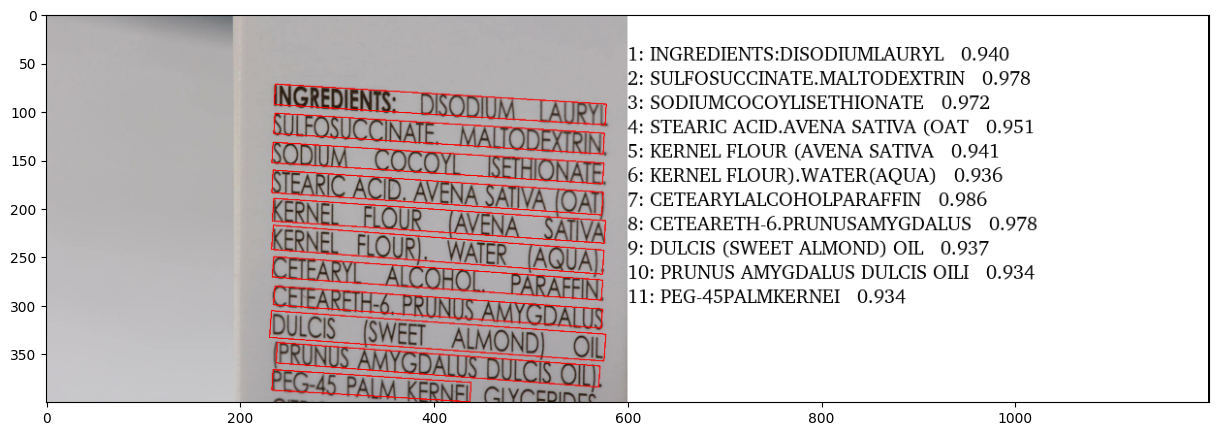

In [75]:
plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, text, accuracy, font_path=font_path)
plt.imshow(annotated);

[2023/02/11 16:38:25] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/11 16:38:26] ppocr DEBUG: dt_boxes num : 25, elapse : 0.7068860530853271
[2023/02/11 16:38:32] ppocr DEBUG: rec_res num  : 25, elapse : 6.664297819137573


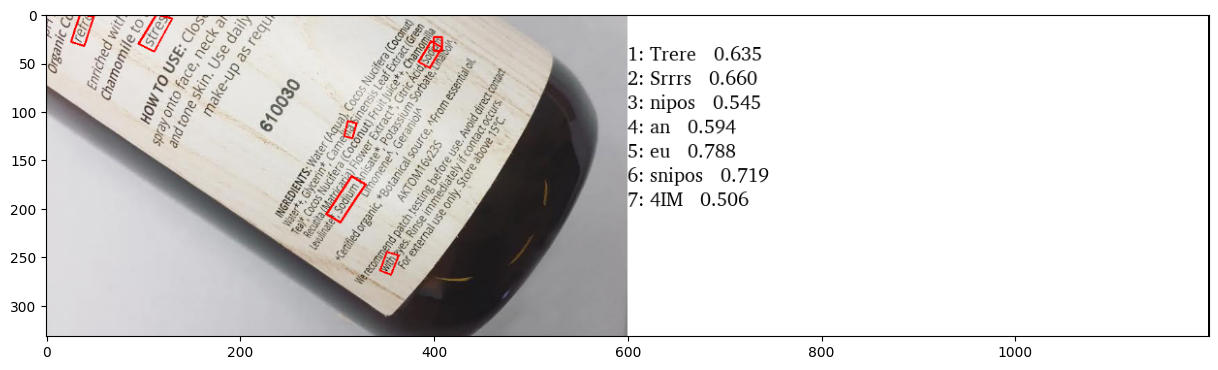

In [101]:
img_path = os.path.join('.', 'Inci3.jpg')
result = ocr.ocr(img_path)

boxes = [res[0] for res in result[0]]
text = [res[1][0] for res in result[0]]
accuracy = [res[1][1] for res in result[0]]

font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, text, accuracy, font_path=font_path)
plt.imshow(annotated);

[2023/02/11 16:41:52] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/11 16:41:52] ppocr DEBUG: dt_boxes num : 13, elapse : 0.18022847175598145
[2023/02/11 16:41:58] ppocr DEBUG: rec_res num  : 13, elapse : 5.933895587921143


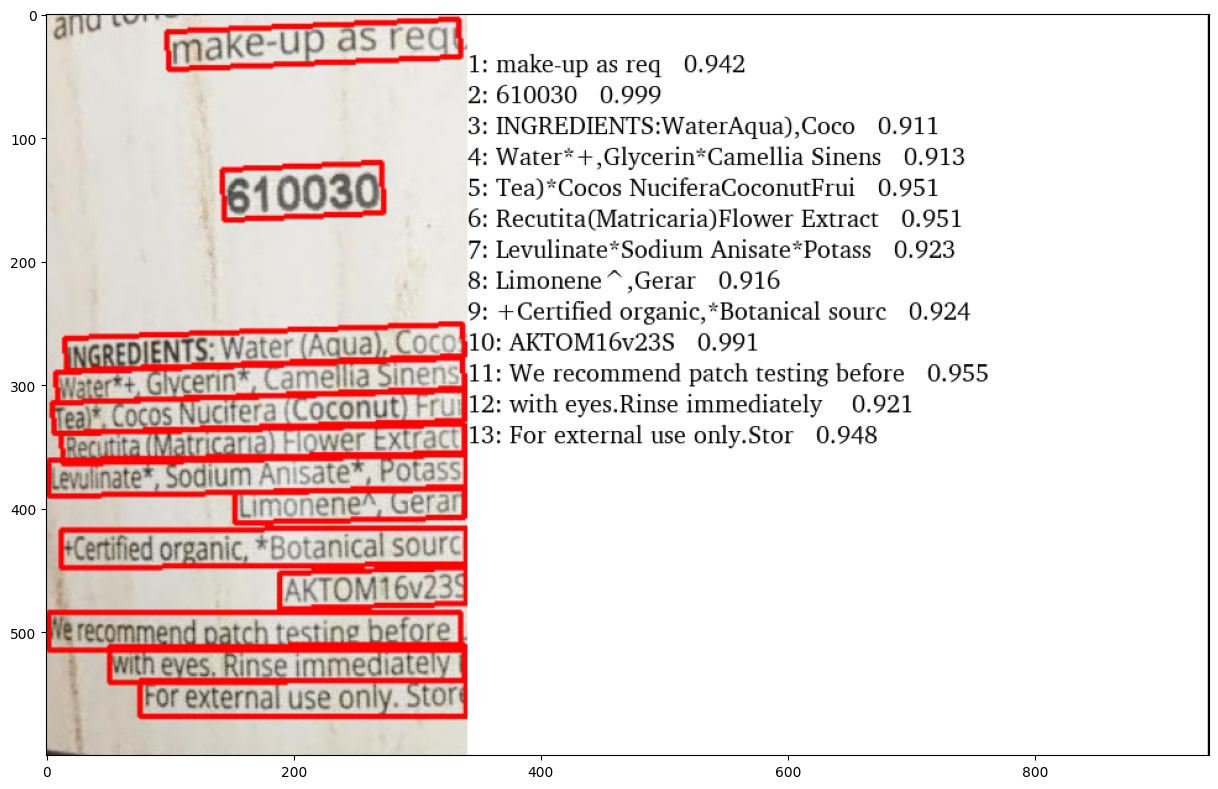

In [102]:
img_path = os.path.join('.', 'Inci3(straighten).jpg')
result = ocr.ocr(img_path)

boxes = [res[0] for res in result[0]]
text = [res[1][0] for res in result[0]]
accuracy = [res[1][1] for res in result[0]]

font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, text, accuracy, font_path=font_path)
plt.imshow(annotated);